In [1]:
import pandas as pd
from random import randint

In [2]:
df = pd.DataFrame.from_dict({
    "Lp": list(range(1, 7)),
    "BezRekomendacji": [459, 424, 449, 499, 484, 476],
    "Zrekomendacjami": [514, 525, 531, 523, 537, 532]
})

print("\n", df, "\n")

df.mean()


    Lp  BezRekomendacji  Zrekomendacjami
0   1              459              514
1   2              424              525
2   3              449              531
3   4              499              523
4   5              484              537
5   6              476              532 



Lp                   3.500000
BezRekomendacji    465.166667
Zrekomendacjami    527.000000
dtype: float64

In [3]:
df_std = df.std()
df_std

Lp                  1.870829
BezRekomendacji    26.873159
Zrekomendacjami     8.124038
dtype: float64

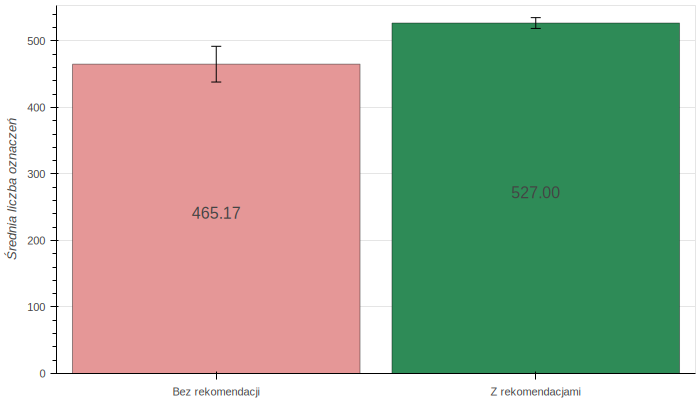

In [7]:
from bokeh.io import output_notebook, show, export_svg
from bokeh.plotting import figure
from bokeh.models import Range1d, ColumnDataSource, Whisker, LabelSet

output_notebook(hide_banner=True)

from IPython.display import SVG, display
from pathlib import Path
import numpy as np


FIGURES_DIR = Path("figures")
FIGURES_DIR.mkdir(exist_ok=True, parents=True)


labels = ["Bez rekomendacji", "Z rekomendacjami"]
mean_times = [df.BezRekomendacji.mean(), df.Zrekomendacjami.mean()]
upper = [mean_times[0] + df_std.BezRekomendacji, mean_times[1] + df_std.Zrekomendacjami]
lower = [mean_times[0] - df_std.BezRekomendacji, mean_times[1] - df_std.Zrekomendacjami]

p = figure(x_range=labels,
           y_axis_label="Średnia liczba oznaczeń",
           width=700,
           height=400,
           output_backend="svg")

p.vbar(x=labels, top=mean_times, color=["#E59797", "seagreen"], width=0.9, line_color="black", line_alpha=0.4)

source_std = ColumnDataSource(data=dict(base=labels, lower=lower, upper=upper))
p.add_layout(
    Whisker(source=source_std, base="base", upper="upper", lower="lower", level="overlay")
)

source_text = ColumnDataSource(data=dict(
    x=labels,
    y=[df.BezRekomendacji.mean() / 2, df.Zrekomendacjami.mean() / 2],
    text=list(map(lambda x: f"{x:.2f}", mean_times))
))
txt_set = LabelSet(source=source_text, x="x", y="y", text="text", level="glyph",
                   text_align="center")
p.add_layout(txt_set)

p.xgrid.grid_line_color = None
p.y_range.start = 0

out_path = FIGURES_DIR / f"users-ann-time.svg"
p.toolbar_location = None
export_svg(p, filename=out_path)
display(SVG(filename=out_path))